In [1]:
%matplotlib inline

import datajoint as dj
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
sns.set_style('ticks', rc={'image.cmap': 'bwr'})

import os
import sys
import inspect

p = !pwd
p = os.path.dirname(os.path.dirname(p[0]))
if p not in sys.path:
    sys.path.append(p)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from cnn_sys_ident.mesonet.data import MultiDataset
from cnn_sys_ident.mesonet.vis import MEIParams, MEIGroup, MEI
from cnn_sys_ident.mesonet.parameters import Core, Readout, Model, RegPath, Fit
from cnn_sys_ident.architectures.training import Trainer
from cnn_sys_ident.mesonet import MODELS

Connecting aecker@52.202.15.166:3306


In [3]:
data_key = {'data_hash': 'cfcd208495d565ef66e7dff9f98764da'}
dataset = MultiDataset() & data_key

In [4]:
model_rel = MODELS['HermiteSparse'] * dataset \
    & 'positive_feature_weights=False AND shared_biases=False' \
    & 'num_filters_2=16'
key = (Fit() * model_rel).fetch(dj.key, order_by='val_loss', limit=1)[0]
model = Fit().load_model(key)

INFO:tensorflow:Restoring parameters from /gpfs01/bethge/home/aecker/lab/projects/microns/cnn-sys-ident/checkpoints/aecker_mesonet_data/647bb1d1bd02979996e492b5422eb95f/model.ckpt


In [5]:
w = model.base.evaluate(model.core.weights_all[0])
print(w.shape)

(13, 13, 1, 128)


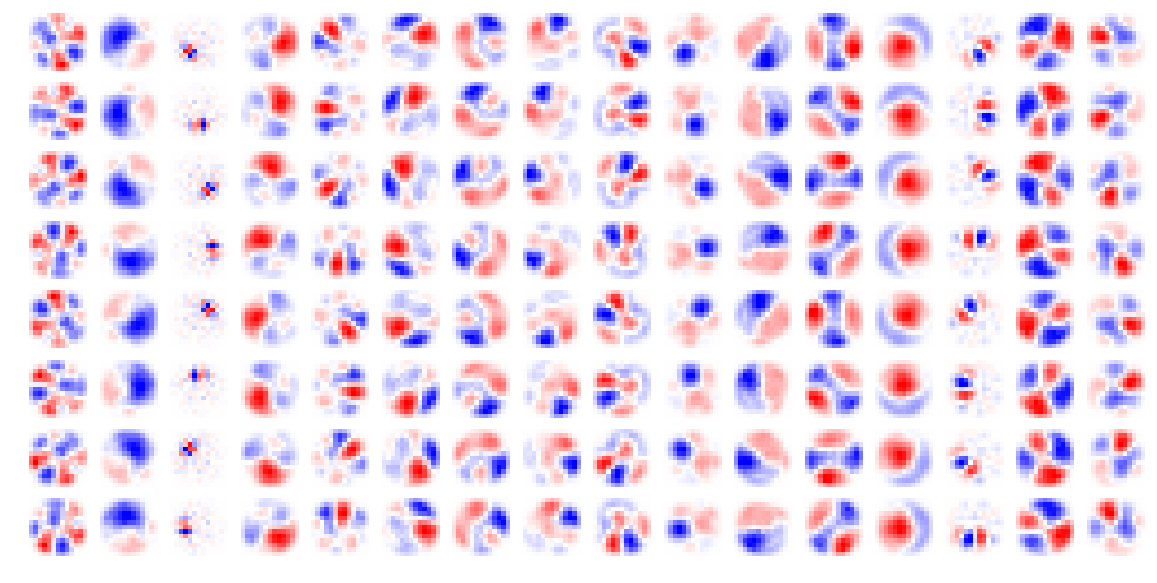

In [6]:
fig, axes = plt.subplots(8, 16, figsize=(20, 10))
for wi, ax in zip(w[:,:,0,:].transpose([2, 0, 1]), axes.flatten()):
    m = np.abs(wi).max()
    ax.imshow(wi, vmin=-m, vmax=m)
    ax.axis('off')

fig.savefig('figures/kernels.eps', format='eps')

# Visualize Hermite functions

In [7]:
from cnn_sys_ident.utils.hermite import hermite_2d, rotation_matrix

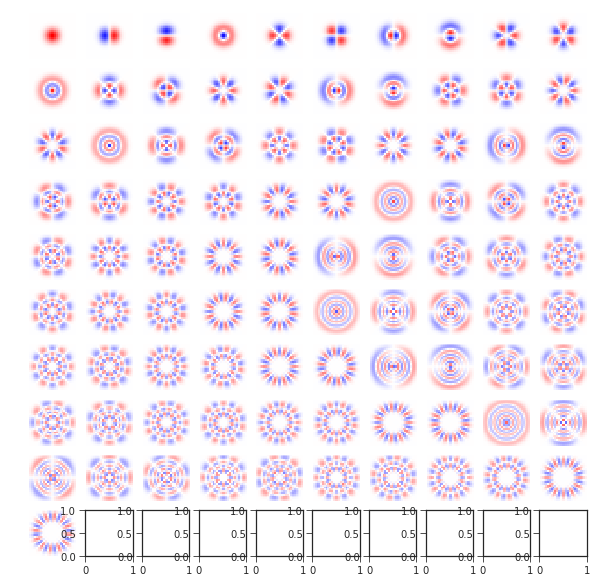

In [11]:
filter_size = 13
upsampling = 2
k = filter_size
H, desc, mu = hermite_2d(k, filter_size*upsampling, xvalmax=2*np.sqrt(k))
N = H.shape[0]
m = int(np.ceil(np.sqrt(N)))
n = int(np.ceil(N / m))
mx = H.max()
fig, axes = plt.subplots(m, n, figsize=(n, m))
for ax, h in zip(axes.flatten(), H):
    ax.imshow(h, vmin=-mx, vmax=mx)
    ax.axis('off')

fig.savefig('figures/hermite_fn.eps', format='eps')